In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack
import pandas as pd


    
def execute(args):

    df = pd.read_csv(args.input_file, header=None, delimiter=',')

    # Number of rows
    print ("Number of rows ", df.count())
    
    print ("Columns ", df.columns)

    orig_columns = len(df.columns)

    print ("Number of original columns ", orig_columns)
    
    columns_list = [int(col) for col in args.show_columns.split(",")]

    max_values_list = [float(col) for col in args.max_values.split(",")]

    df_copy = df.copy()
    
    for column, max_value in zip(columns_list, max_values_list):
        """
        max_value = np.max(df_copy[column][args.min_row:args.max_row])
        min_value = np.min(df_copy[column][args.min_row:args.max_row])

        df_copy[column] = ((df_copy[column][args.min_row:args.max_row] - min_value)/
        (max_value - min_value))
        """
        
        df_copy[column] = df_copy[column]/max_value

    for column in df_copy.columns:

        min_column = np.min(df_copy[column][args.min_row:args.max_row])
        max_column = np.max(df_copy[column][args.min_row:args.max_row])

        norm_column = ((df_copy[column][8400:9000] - min_column)/
                       (max_column - min_column))
        
        mean = np.mean(norm_column)
        std = np.std(norm_column)

        print ("Column: ", column, " Mean: ", mean, " Std: ", std)

    # plot the figures
    plt.figure(1)
    plt.subplot(1, 1, 1)
    plt.plot(df_copy[columns_list][args.min_row:args.max_row])
    plt.show()

Number of rows  0    40536
1    40536
2    40536
3    40536
4    40536
5    40536
6    40536
7        0
dtype: int64
Columns  Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')
Number of original columns  8
Column:  0  Mean:  0.5  Std:  0.319142369252
Column:  1  Mean:  1.0  Std:  0.0
Column:  2  Mean:  0.0  Std:  0.0
Column:  3  Mean:  0.0  Std:  0.0
Column:  4  Mean:  0.46875  Std:  0.0
Column:  5  Mean:  0.51724137931  Std:  1.19209289551e-08
Column:  6  Mean:  1.0  Std:  0.0
Column:  7  Mean:  nan  Std:  nan


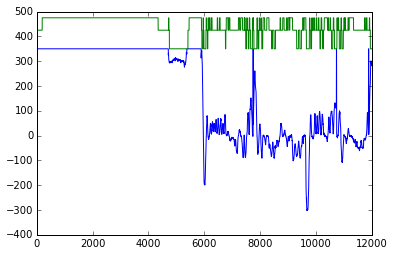

In [10]:
class Defaults:

    input_file = "Data/20181006/long_rung.log"  # csv
    min_row = 5000  # 5000
    max_row = 17000  # 17000
    show_columns = "1,6"  # blue, orange, green,red, violetx
    max_values = "1,1"

    
execute(Defaults)